## Multiple Linear Regression and Regression Error Metrics

## Import library

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [108]:
#pip install pyforest

In [109]:
import pyforest

In [110]:
from pyforest import *

In [111]:
lazy_imports()

['import sklearn',
 'from sklearn.cluster import KMeans',
 'import os',
 'from sklearn.linear_model import RidgeCV',
 'from scipy import stats',
 'from sklearn.model_selection import KFold',
 'from sklearn.ensemble import RandomForestClassifier',
 'import re',
 'import altair as alt',
 'import lightgbm as lgb',
 'from sklearn.model_selection import train_test_split',
 'import tensorflow as tf',
 'import spacy',
 'from scipy import signal as sg',
 'import datetime as dt',
 'import nltk',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import imutils',
 'import matplotlib as mpl',
 'from sklearn.ensemble import RandomForestRegressor',
 'from PIL import Image',
 'from sklearn.preprocessing import OneHotEncoder',
 'import pydot',
 'from sklearn.preprocessing import LabelEncoder',
 'import xgboost as xgb',
 'import textblob',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn import metrics',
 'import pl

In [112]:
#pip install -U scikit-learn

## Read Dataset

In [113]:
df = pd.read_csv("Advertising.csv")
df

<IPython.core.display.Javascript object>

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [114]:
df.shape

(200, 4)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [116]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [117]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

<IPython.core.display.Javascript object>

111.25


<IPython.core.display.Javascript object>

7.39509972887452


In [118]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

<IPython.core.display.Javascript object>

257.5


<IPython.core.display.Javascript object>

255.57533136044253


In [119]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

<IPython.core.display.Javascript object>

307.5


<IPython.core.display.Javascript object>

342.153109002388


## Distribution of features

<IPython.core.display.Javascript object>

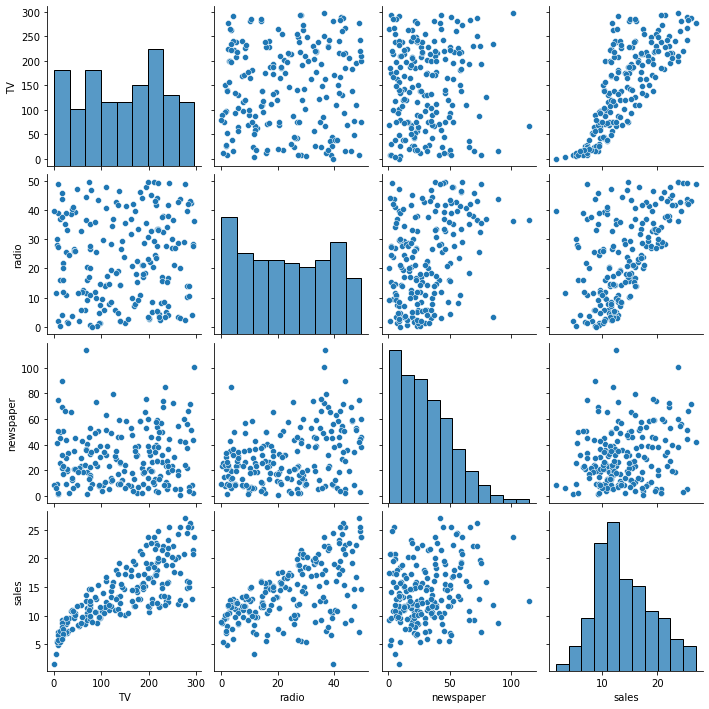

In [120]:
sns.pairplot(df);

In [121]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

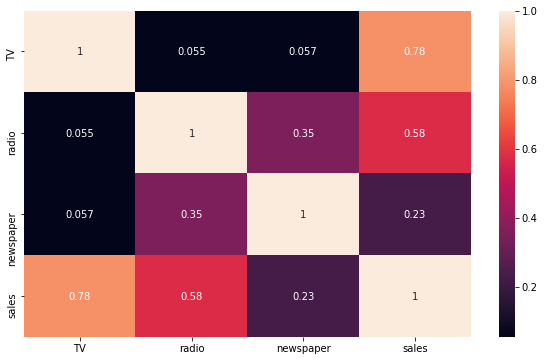

In [122]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [123]:
# pip install scikit-learn

In [124]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [125]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [126]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [129]:
df.sample(15)

,TV,radio,newspaper,sales
132,8.4,27.2,2.1,5.7
128,220.3,49.0,3.2,24.7
65,69.0,9.3,0.9,9.3
172,19.6,20.1,17.0,7.6
7,120.2,19.6,11.6,13.2
133,219.8,33.5,45.1,19.6
115,75.1,35.0,52.7,12.6
5,8.7,48.9,75.0,7.2
66,31.5,24.6,2.2,9.5
168,215.4,23.6,57.6,17.1


In [130]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (140, 3)
Train target shape   :  (140,)
Test features shape  :  (60, 3)
Test target shape    :  (60,)


In [131]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [132]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [133]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
model = LinearRegression()

In [136]:
model.fit(X_train, y_train)

LinearRegression()

In [137]:
y_pred = model.predict(X_test)
y_pred  #y_test

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [138]:
y_pred = model.predict(X_test.loc[[95]])
y_pred

array([16.5653963])

In [139]:
y_pred2 = model.predict(X_test.head(1))
y_pred2 

array([16.5653963])

In [140]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [141]:
model.intercept_

2.7089490925159048

In [142]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0

In [143]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.565396297434837

In [144]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [145]:
my_dict

{'Actual': 95     16.9
 15     22.4
 30     21.4
 158     7.3
 128    24.7
 115    12.6
 69     22.3
 170     8.4
 174    11.5
 45     14.9
 66      9.5
 182     8.7
 165    11.9
 78      5.3
 186    10.3
 177    11.7
 56      5.5
 152    16.6
 82     11.3
 68     18.9
 124    19.7
 16     12.5
 148    10.9
 93     22.2
 65      9.3
 60      8.1
 84     21.7
 67     13.4
 125    10.6
 132     5.7
 9      10.6
 18     11.3
 55     23.7
 75      8.7
 150    16.1
 104    20.7
 135    11.6
 137    20.8
 164    11.9
 76      6.9
 79     11.0
 197    12.8
 38     10.1
 24      9.7
 122    11.6
 195     7.6
 29     10.5
 19     14.6
 143    10.4
 86     12.0
 114    14.6
 173    11.7
 5       7.2
 126     6.6
 117     9.4
 73     11.0
 140    10.9
 98     25.4
 172     7.6
 96     11.7
 Name: sales, dtype: float64,
 'Pred': array([16.5653963]),
 'Residual': 95      0.334604
 15      5.834604
 30      4.834604
 158    -9.265396
 128     8.134604
 115    -3.965396
 69      5.734604
 170    -8.1

In [148]:
comparing = pd.DataFrame(my_dict)
comparing 

<IPython.core.display.Javascript object>

ValueError: array length 1 does not match index length 60

In [ ]:
result_sample = comparing.head(25)
result_sample

In [ ]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

## Error Metrics

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [103]:
R2_score = r2_score(y_test, y_pred)
R2_score

ValueError: Found input variables with inconsistent numbers of samples: [60, 1]

In [101]:
mae = mean_absolute_error(y_test, y_pred)     
mae

ValueError: Found input variables with inconsistent numbers of samples: [60, 1]

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

In [99]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [100]:
mae / sales_mean

NameError: name 'mae' is not defined

In [ ]:
rmse / sales_mean

## Adjusted R2 score 

https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

In [ ]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [ ]:
adj_r2(y_test, y_pred, df)

## What is the concept of punishment for RMSE error metric?

In [85]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5500]}

In [86]:
df_2 = pd.DataFrame(variables)
df_2

<IPython.core.display.Javascript object>

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5500


In [87]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [88]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5500,500


In [89]:
#mae
df_2.residual.sum()/5 #200

240.0

In [90]:
#rmse
((df_2.residual**2).sum()/5)**0.5 #209.76

275.68097504180446

## Evaluation Model

In [93]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [92]:
eval_metric(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [60, 1]

In [95]:
y_train_pred = model.predict(X_train)

In [96]:
eval_metric(y_train, y_train_pred)

<IPython.core.display.Javascript object>

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.158150294807253
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

In [149]:
residuals = y_test-y_pred

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

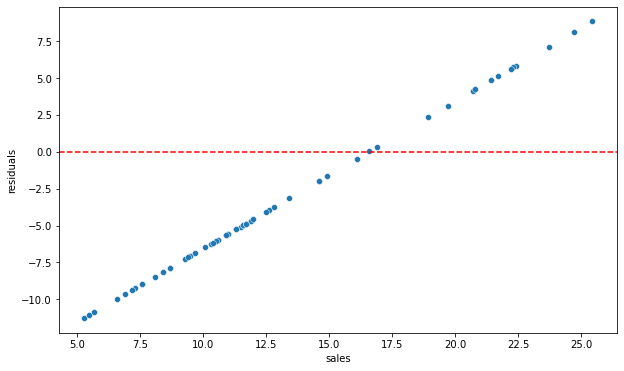

In [150]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='sales', ylabel='Density'>

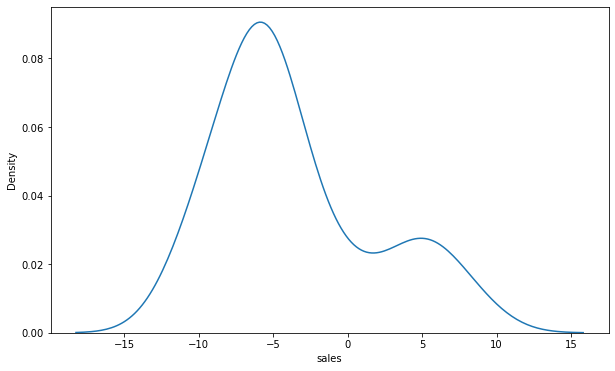

In [151]:
sns.kdeplot(residuals)

In [154]:
#pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


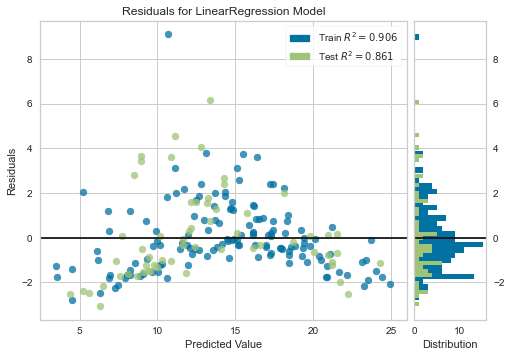

In [155]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

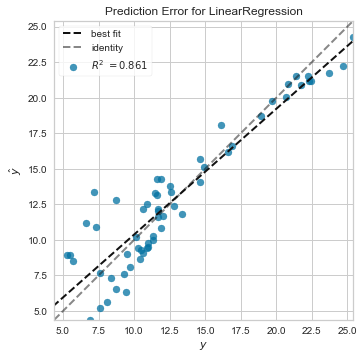

In [156]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

## Retraining Model on Full Data

In [157]:
final_model = LinearRegression()

In [158]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [159]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [160]:
final_model.intercept_

2.9388893694594067

In [161]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [162]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

<IPython.core.display.Javascript object>

In [163]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [164]:
adv = [[150, 20, 15]]

In [165]:
adv

[[150, 20, 15]]

In [166]:
final_model.predict(adv)

array([13.55862413])

In [167]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [168]:
final_model.intercept_

2.9388893694594067

In [169]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495994

In [170]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [171]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [172]:
14.01627059 - 13.55862413

0.4576464599999994

## The effect of features on the predicted label

In [ ]:
coeff_df

In [ ]:
coeff_df.Coefficient * adv[0]

In [ ]:
6.864697 / 13.55862413

In [ ]:
3.770600 / 13.55862413

In [ ]:
-0.015562 / 13.55862413